In [1]:
# import packages
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.stats import variation
from scipy.optimize import curve_fit
from matplotlib.ticker import EngFormatter
from matplotlib.dates import DateFormatter

%config InlineBackend.figure_format = 'retina'
plt.rcParams.update({'font.size': 14})

In [2]:
# user-defined path to directory
litrev_dir = '/Users/Dana/Desktop/Jupyter/WISC/NaturalCommunity/lit_review_data_supp/' 

In [3]:
# method to find break in slope and calculate trends on each side of break
# written by David Dralle

def func_broken_stick(x,threshold,b1,b2,a1):
    # a1, b1 are slope and intercept for left curve
    # b2 is slope for right curve
    # intercept on right curve is determined by the intersection constraint
    a2 = (b1*threshold - b2*threshold + a1)
    return np.where(x<threshold, b1*x+a1, b2*x+a2)

def broken_stick_fit(x, y, 
                    threshold_lower_percentile_bound=0,
                    threshold_upper_percentile_bound=100, 
                    slope_left_lower = -np.inf, 
                    slope_left_upper = np.inf,
                    slope_right_lower = -np.inf,
                    slope_right_upper = np.inf
                    ):
    """
    @desc:
    Fits broken stick, with constraints if desired. Note, if using for CQ power law fits, data should first
    be log-transformed.
    
    @params:
    threshold_upper_percentile: upper bound on possible thresholds determined through a percentile on the x data
    threshold_lower_percentile: lower bound on possible thresholds determined through a percentile on the x data
    slope_left_lower: lower constraint on left slope
    slope_left_upper: upper constraint on left slope
    slope_right_lower: lower constraint on right slope
    slope_right_upper: upper constraint on right slope
    
    @returns:
    popt: fitted broken stick paramters as a list
        [threshold: threshold for slope break, 
        b1: slope on left line, 
        b2: slope on right line,
        a1: intercept on left line]
        Note that if the curves intersect, the intercept on the right curve is constrained by the other fits
        a2 = (b1*threshold - b2*threshold + a1)
    standard_errors: standard errors for the fitted parameters
    """

    
    popt_temp, pcov_temp = curve_fit(func_broken_stick, x, y, 
                                    bounds = [(np.percentile(x,threshold_lower_percentile_bound), slope_left_lower, slope_right_lower, -np.inf), 
                                              (np.percentile(x,threshold_upper_percentile_bound), slope_left_upper, slope_right_upper, np.inf)
                                             ]
                                   )
    standard_errors = np.sqrt(np.diag(pcov_temp))
    return popt_temp, standard_errors

In [4]:


pump_rates = []
pump_range = []

for filename in os.listdir(litrev_dir+'longterm_site_data_rev1'):
    try:
        pump_range = pump_range + [float(filename.split('_')[0])]
        pump_rates = pump_rates + [filename.split('_')[0]]
    except:
        print('')

def doy(dt):
    dt = pd.to_datetime(dt)
    return dt.timetuple().tm_yday
# flow_data['doy'] = [doy(dt) for dt in flow_data.reset_index().datetimeUTC]

def resample_median(array_like):
    return np.nanpercentile(array_like,50)



In [5]:
import hydrofunctions as hf
WI_sites = hf.NWIS(stateCd='WI',#start_date = '1980-10-1',end_date = '2021-10-1',
                  parameterCd='00060').df().columns
WI_sites = [s.split(':')[1] for s in WI_sites if not s.endswith('qualifiers')]

Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&stateCd=WI&parameterCd=00060


/Users/Dana/miniconda3/lib/python3.8/site-packages/hydrofunctions/hydrofunctions.py:107: HydroUserWarning: It is not possible to determine the frequency for one of the datasets in this request. This dataset will be set to a frequency of 0 minutes
  warnings.warn(


In [6]:

site_lens = []
site_meanflow = []
site_august_meanflow = []
site_august_medianflow = []
for i in range(len(WI_sites)):
    print(i,WI_sites[i])
    try:
        site_data = hf.NWIS(WI_sites[i],'dv',start_date='1980-10-1',end_date='2021-10-1',
                           parameterCd='00060').df()
        site_data = site_data[~(site_data[list(site_data.columns)[1]]=='hf.missing')]
        site_lens.append(len(site_data[~(site_data[site_data.columns[0]].isna())])/365)
        site_meanflow.append(site_data[site_data.columns[0]].mean())
        site_august_meanflow.append(site_data[site_data.index.month==8][site_data.columns[0]].mean())
        site_august_medianflow.append(site_data[site_data.index.month==8][site_data.columns[0]].median())
    except:
        site_lens.append(0)
        site_meanflow.append(np.nan)
        site_august_meanflow.append(np.nan)
        site_august_medianflow.append(np.nan)

0 04024080
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=04024080&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
1 04024081
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=04024081&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
2 04024314
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=04024314&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
3 04024315
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=04024315&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
4 04024318
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=04024318&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
5 04024320
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=04024320&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
6 04024430
Requested data from https://waterservices.usgs.gov/nw

Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=04071795&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
54 04071858
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=04071858&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
55 04072000
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=04072000&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
56 04072076
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=04072076&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
57 04072150
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=04072150&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
58 04072220
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=04072220&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
59 04072410
Requested data from https://waterservices.usgs.gov/nwis/dv

Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=04084200&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
107 040844152
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=040844152&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
108 040844153
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=040844153&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
109 040844215
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=040844215&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
110 04084445
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=04084445&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
111 04084445
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=04084445&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
112 04084475
Requested data from https://waterservices.usgs

Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=04086139&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
159 04086149
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=04086149&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
160 04086150
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=04086150&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
161 04086152
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=04086152&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
162 04086175
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=04086175&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
163 04086200
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=04086200&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
164 04086250
Requested data from https://waterservices.usgs.gov/n

Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=040871488&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
211 04087159
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=04087159&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
212 04087160
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=04087160&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
213 04087170
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=04087170&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
214 04087204
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=04087204&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
215 04087214
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=04087214&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
216 04087220
Requested data from https://waterservices.usgs.gov/

Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=05357302&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
263 05357335
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=05357335&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
264 0535739503
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=0535739503&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
265 0535739504
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=0535739504&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
266 053573952
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=053573952&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
267 05357500
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=05357500&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
268 05358000
Requested data from https://waterservices.

Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=05369955&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
315 05369970
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=05369970&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
316 05369985
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=05369985&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
317 05370000
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=05370000&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
318 05370500
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=05370500&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
319 05372000
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=05372000&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
320 05378183
Requested data from https://waterservices.usgs.gov/n

Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=05392102&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
367 05392187
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=05392187&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
368 05392350
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=05392350&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
369 05392400
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=05392400&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
370 05393000
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=05393000&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
371 05393500
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=05393500&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
372 05394000
Requested data from https://waterservices.usgs.gov/n

Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=05403042&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
419 05403043
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=05403043&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
420 05403044
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=05403044&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
421 05403045
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=05403045&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
422 05403500
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=05403500&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
423 05403700
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=05403700&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
424 05404000
Requested data from https://waterservices.usgs.gov/n

Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=05408500&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
471 05409000
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=05409000&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
472 05409500
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=05409500&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
473 05409830
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=05409830&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
474 05409860
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=05409860&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
475 05409870
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=05409870&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
476 05409890
Requested data from https://waterservices.usgs.gov/n

Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=05426000&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
523 05426031
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=05426031&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
524 05426060
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=05426060&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
525 05426067
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=05426067&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
526 05426070
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=05426070&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
527 05426086
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=05426086&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
528 05426250
Requested data from https://waterservices.usgs.gov/n

Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=05430000&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
575 05430030
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=05430030&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
576 05430095
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=05430095&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
577 05430100
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=05430100&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
578 05430150
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=05430150&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
579 05430175
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=05430175&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
580 05430403
Requested data from https://waterservices.usgs.gov/n

Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=055451345&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
627 05545300
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=05545300&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
628 05545750
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=05545750&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
629 05546500
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=05546500&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
630 05546758
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=05546758&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
631 05548163
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=05548163&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
632 05548164
Requested data from https://waterservices.usgs.gov/

Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=431655089393801&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
676 433615088202501
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=433615088202501&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
677 433727088215801
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=433727088215801&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
678 433821090063801
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=433821090063801&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
679 433939090050501
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=433939090050501&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
680 434034088252401
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=434034088252401&parameterCd=00060&startDT=1980-10-1&endD

Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=464226092005600&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1


In [30]:
sitedf = pd.DataFrame.from_dict({'sitenum':WI_sites,
                                'record_length':site_lens,
                                'mean_streamflow':site_meanflow,
                                'mean_august_streamflow':site_meanflow,
                                'median_august_streamflow':site_meanflow})
keepsites = sitedf[(sitedf.record_length>10) &
      (sitedf.mean_streamflow<40)].reset_index().drop(columns='index')
# # knock out bad data sites
# keepsites = keepsites[~(keepsites.index.isin([3,4]))].reset_index()
# keepsites = keepsites[~(keepsites.index.isin([11]))].reset_index()


In [32]:

site_august_meanflow = []
site_august_medianflow = []
print('total',len(keepsites))
for i in range(len(keepsites)):
    print(i,WI_sites[i])
    try:
        site_data = hf.NWIS(keepsites.iloc[i].sitenum,'dv',start_date='1980-10-1',end_date='2021-10-1',
                           parameterCd='00060').df()
        site_data = site_data[~(site_data[list(site_data.columns)[1]]=='hf.missing')]
        site_august_meanflow.append(site_data[site_data.index.month==8][site_data.columns[0]].mean())
        site_august_medianflow.append(site_data[site_data.index.month==8][site_data.columns[0]].median())
#         print(site_august_meanflow)
#         print(site_august_medianflow)
    except:
        site_august_meanflow.append(np.nan)
        site_august_medianflow.append(np.nan)

total 53
0 04024080
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=040263205&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
[19.57559607293128]
[18.3]
1 04024081
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=04026390&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
[19.57559607293128, 7.331182795698922]
[18.3, 0.53]
2 04024314
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=04073462&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
[19.57559607293128, 7.331182795698922, 2.1873361082206104]
[18.3, 0.53, 1.58]
3 04024315
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=04073468&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
[19.57559607293128, 7.331182795698922, 2.1873361082206104, 23.79218894009217]
[18.3, 0.53, 1.58, 18.4]
4 04024318
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=04074538&pa

Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=04087204&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
[19.57559607293128, 7.331182795698922, 2.1873361082206104, 23.79218894009217, 18.528686635944705, 13.389208211143693, 0.2543010752688219, 0.2543010752688219, 4.234894991922454, 14.609847198641766, 15.904791502753728, 2.3315437788018434, 12.350268817204306, 15.482336742722268, 11.157168458781364, 0.7401478494623649, 2.70002688172043, 0.07610215053763439, 13.271451612903236, 30.28171215880893, 18.641125098347768]
[18.3, 0.53, 1.58, 18.4, 17.0, 0.95, 0.15, 0.15, 2.5, 2.81, 7.0, 0.88, 2.85, 6.2, 2.46, 0.15, 0.66, 0.0, 3.9050000000000002, 8.28, 5.25]
21 04026450
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=04087214&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
[19.57559607293128, 7.331182795698922, 2.1873361082206104, 23.79218894009217, 18.528686635944705, 13.389208211143693, 0.2543010752688219, 0.254301

Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=05435943&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
[19.57559607293128, 7.331182795698922, 2.1873361082206104, 23.79218894009217, 18.528686635944705, 13.389208211143693, 0.2543010752688219, 0.2543010752688219, 4.234894991922454, 14.609847198641766, 15.904791502753728, 2.3315437788018434, 12.350268817204306, 15.482336742722268, 11.157168458781364, 0.7401478494623649, 2.70002688172043, 0.07610215053763439, 13.271451612903236, 30.28171215880893, 18.641125098347768, 9.25612903225806, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 2.3284736428009456, 1.330967741935484, 2.203424317617867, 8.210508684863525, 7.440903225806452, 10.104590570719605, 21.73870967741936, 19.912335483870965]
[18.3, 0.53, 1.58, 18.4, 17.0, 0.95, 0.15, 0.15, 2.5, 2.81, 7.0, 0.88, 2.85, 6.2, 2.46, 0.15, 0.66, 0.0, 3.9050000000000002, 8.28, 5.25, 2.4450000000000003, nan, 

In [54]:
keepsites.head()

,sitenum,record_length,mean_streamflow,mean_august_streamflow,median_august_streamflow
0,040263205,22.520548,22.204404,22.204404,22.204404
1,04026390,12.117808,23.653812,23.653812,23.653812
2,04073462,31.605479,3.441860,3.441860,3.441860
3,04073468,28.320548,37.886194,37.886194,37.886194
4,04074538,13.506849,28.356276,28.356276,28.356276


In [34]:
abs(np.array(site_august_meanflow)-np.array(site_august_medianflow))/np.array(site_august_meanflow)

array([0.06516257, 0.92770607, 0.27766017, 0.22663694, 0.08250378,
       0.92904734, 0.41014799, 0.41014799, 0.40966659, 0.80766397,
       0.55988106, 0.62256767, 0.76923579, 0.59954365, 0.77951395,
       0.79733779, 0.75555799, 1.        , 0.70575939, 0.72656764,
       0.71836464, 0.7358507 ,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan, 0.94416943, 0.85724673,
       0.67777427, 0.77346105, 0.77153311, 0.87827315, 0.22718504,
       0.35718239, 0.37049877, 0.6005127 ])

In [55]:
flow = ''
for i in [5,-4]:
    print(i,WI_sites[i])
    site_data = hf.NWIS(keepsites.iloc[i].sitenum,'dv',start_date='1980-10-1',end_date='2021-10-1',
                       parameterCd='00060').df()
    site_data = site_data[~(site_data[list(site_data.columns)[1]]=='hf.missing')]
    if len(flow)==0:
        flow = site_data.drop(columns=site_data.columns[1]).rename(columns={site_data.columns[0]:keepsites.sitenum.values[i]})
    else:
        site_data = site_data.drop(columns=site_data.columns[1]).rename(columns={site_data.columns[0]:keepsites.sitenum.values[i]})
        flow = flow.merge(site_data,left_index=True,right_index=True)

5 04024320
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=04084911&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1
-4 451337089035401
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=05432927&parameterCd=00060&startDT=1980-10-1&endDT=2021-10-1


In [61]:
def resample_10p(array_like):
    return np.nanpercentile(array_like,10)
def resample_90p(array_like):
    return np.nanpercentile(array_like,90)

(0.1, 1000)

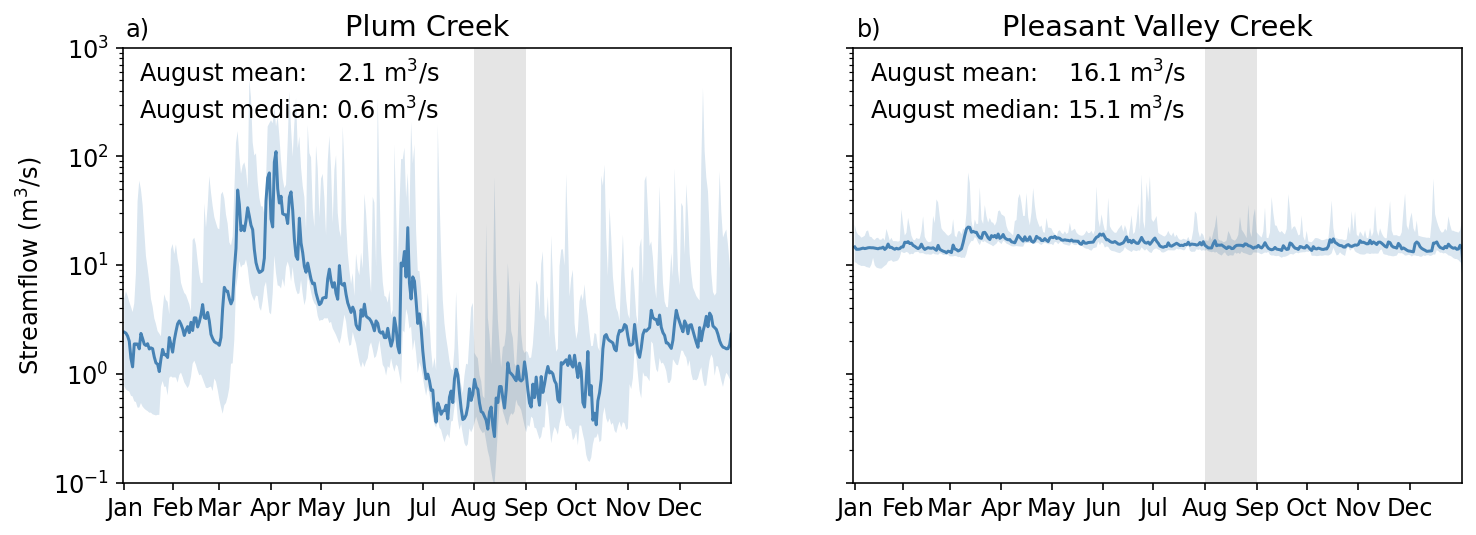

In [107]:
flow['doy'] = [doy(dt) for dt in flow.reset_index().datetimeUTC]
flow_medyr = flow.groupby('doy').median()
flow_10pyr = flow.groupby('doy').agg(resample_10p)
flow_90pyr = flow.groupby('doy').agg(resample_90p)

names = ['Plum Creek','Pleasant Valley Creek']
letters = ['a)','b)']

plt.rcParams.update({'font.size': 12})
fig,ax = plt.subplots(1,2,figsize = (12,4),sharey=True)

for i in range(2):
    ax0 = ax[i]
    ax0.fill_between(flow_medyr.index,flow_10pyr[flow.columns[i]],
                    flow_90pyr[flow.columns[i]],alpha=0.2,facecolor='steelblue')
    ax0.plot(flow_medyr[flow.columns[i]],c='steelblue')
    ax0.set_xlim(0,365)
    ax0.set_xticks([1,30,58,89,119,150,180,211,
              242,272,303,334])
    ax0.set_xticklabels(['Jan','Feb','Mar','Apr','May',
                   'Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
    ax0.set_title(names[i])
    amean = flow[flow.index.month==8][flow.columns[i]].mean()
    amed = flow[flow.index.month==8][flow.columns[i]].median()
    ax0.text(10,220,'August mean:    %2.1f m$^3$/s\nAugust median: %2.1f m$^3$/s' %(amean,amed),
            fontsize = 12)
    ax0.axvspan(211,242,facecolor='k',alpha=0.1)
    ax0.text(2,1300,letters[i],fontsize = 12)
ax[0].set_yscale('log')
ax[0].set_ylabel('Streamflow (m$^3$/s)')
ax[0].set_ylim(0.1,1000)

In [108]:
flow.head()

,04084911,05432927,doy
datetimeUTC,,,
2010-10-01 00:00:00+00:00,6.78,17.0,274
2010-10-02 00:00:00+00:00,8.19,16.9,275
2010-10-03 00:00:00+00:00,6.58,16.8,276
2010-10-04 00:00:00+00:00,5.33,16.8,277
2010-10-05 00:00:00+00:00,4.44,16.9,278
